In [1]:
%load_ext autoreload
%autoreload 2

from infomap import Infomap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matching import create_bipartite_graph, similarity, match, draw_match, color_graph

In [2]:
def run_infomap(G, **kwargs):
    im = Infomap(**kwargs)
    im.add_networkx_graph(G)
    im.run()
    return im.get_dataframe(["module_id", "flow", "node_id"])

karate = nx.karate_club_graph()

m1 = run_infomap(karate, markov_time=0.9)
m2 = run_infomap(karate, markov_time=1.3)

In [3]:
m1_group = m1.groupby("module_id")
m2_group = m2.groupby("module_id")

def group_to_dict(grouped):
    m = defaultdict(list)
    for group, nodes in grouped:
        for node in nodes.itertuples():
            m[group].append((node.node_id, node.flow))
            
    return dict(m)

m1 = group_to_dict(m1_group)
m2 = group_to_dict(m2_group)

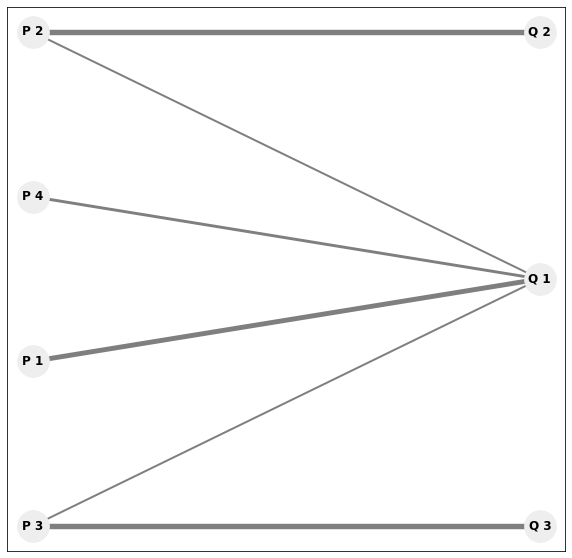

In [4]:
# for illustration, not needed
S = similarity(m1, m2)
B = create_bipartite_graph(*S)
pos = draw_match(B)

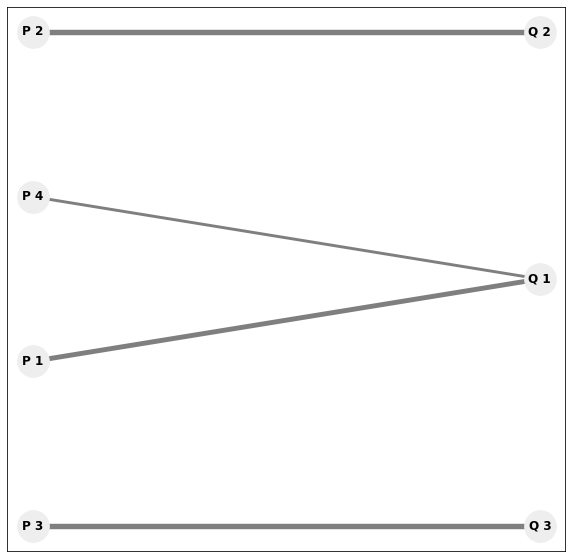

In [5]:
M = match(m1, m2)
_ = draw_match(M, pos=pos)

In [6]:
colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
color_graph(M, colors)

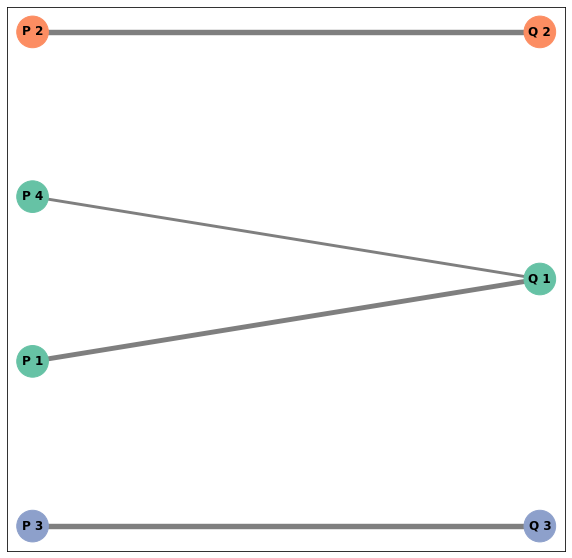

In [7]:
_ = draw_match(M, pos=pos)